In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
df1 = pd.read_csv('data/Surface_Drinking_Water_Importance__Feature_Layer_.csv')
#us_geo = gpd.read_file('images/us_geo.json')
df1.drop(['SHAPEAREA', 'SHAPELEN', 'OBJECTID'], axis=1, inplace=True)
# Totaling 96701 rows of data

In [2]:
def huc_area(df, lower_lim, upper_lim, col_name='IMP1'): # -> dataframe, int, int, str
    #defines an region with the hydrologic unit code
    #returns a DataFrame with that area
    df_state = df[(df['HUC_12'] >= lower_lim*100000000) & (df['HUC_12'] < upper_lim*100000000)]
    return df_state[(df_state[col_name] > 0) & (df_state[col_name] > 0.0)]  

In [3]:
df1['threats_per'] = df1['PER_INSEC3'] + df1['PER_DEV3'] + df1['PER_FIRE3']
# Total percentage of threats added together from Insect/Disease, Development & Fire. 

df1['per_forest'] = df1['PER_NFS2'] + df1['PER_PRI2'] + df1['PER_PRONF2'] + df1['PER_FOR2']
# Total Percentage of forest within a subregion, there is overlap with protected/private and national forests
    #and because I do not have the raw data I can not parse through to see where the overlap is. 
    
df = df1[(df1['per_forest'] > 0) & (df1['threats_per'] > 0)] # becomes 61870 rows of data
# Collecting rows that do not have zero values in all the columns of either the threats to forests or percent of forest
df

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_FOR2,PER_PRONF2,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,POPSERVED,threats_per,per_forest
0,10100081107,Patrick Brook-St. John River,69,42.09,0.00,0.0,42.09,0.00000,3.84282,0.00000,...,61,0,0,61,0.00,9.13,0.00,0,9.13,122
1,10100081108,Gagnon Brook-St. John River,71,40.47,0.00,0.0,40.47,0.00000,2.27441,0.00000,...,57,0,0,57,0.00,5.62,0.00,2840,5.62,114
8,10100020101,Smith Brook,47,38.54,16.45,0.0,22.09,0.00000,0.00000,23.20493,...,82,35,0,47,0.00,0.00,60.21,0,60.21,164
9,10100020102,Russell Brook,47,40.89,21.62,0.0,19.27,0.32303,0.00000,8.47241,...,87,46,0,41,0.79,0.00,20.72,0,21.51,174
10,10100020103,Soper Brook,47,38.07,33.84,0.0,4.23,0.62434,0.00000,12.46412,...,81,72,0,9,1.64,0.00,32.74,0,34.38,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87615,180800031203,Roberts Canyon-Long Valley Creek,0,0.00,0.00,0.0,0.00,0.00000,0.00000,0.00000,...,7,5,4,2,75.59,0.00,100.00,0,175.59,18
87616,180800031204,Zamboni Hot Springs-Long Valley Creek,0,0.00,0.00,0.0,0.00,0.00000,0.00000,0.00000,...,3,3,3,0,80.05,0.00,100.00,0,180.05,9
87617,180800031301,Rhodes Creek,0,0.00,0.00,0.0,0.00,0.00000,0.00000,0.00000,...,40,35,35,5,19.03,0.00,100.00,0,119.03,115
87618,180800031302,Robinson Canyon-Long Valley Creek,0,0.00,0.00,0.0,0.00,0.00000,0.00000,0.00000,...,9,6,6,3,4.45,0.00,100.00,0,104.45,24


In [4]:
#Hn = The population does not affect the level of threat of development to forests
#Ha = The population does affect the level of threat of development to forest

In [5]:
def pop_served_graph(name_label, pop, huc_are): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 2, sharey='row', figsize=(15, 10))
    df_imp0 = huc_are['IMP1']
    df_lower = huc_are['HUC_12']
    total_dev = huc_area(huc_are, 100, 2000, 'DEV_FOR3')
    ax[0].scatter(df_lower, df_imp0)
    ax[0].set_title('Water Level Importance', size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    mean = df_imp0 = huc_are['IMP1'].mean()
    ax[0].axhline(mean)
    ax[0].scatter(total_dev['HUC_12'], total_dev['PER_DEV3'], marker = 'x', color='red', alpha=.2)


    df_pop0 = pop['IMP1']
    df_lower_pop = pop['HUC_12']
    ax[1].scatter(df_lower_pop, df_pop0, color='green')
    ax[1].set_title('Population Served', size=14, color='green')
    ax[1].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop['IMP1'].mean()
    ax[1].axhline(pop_mean)
    ax[1].scatter(pop['HUC_12'], pop['PER_DEV3'], marker = 'x', color='red', alpha=.2)
    plt.suptitle(name_label, size=16)
    plt.tight_layout()
    ax

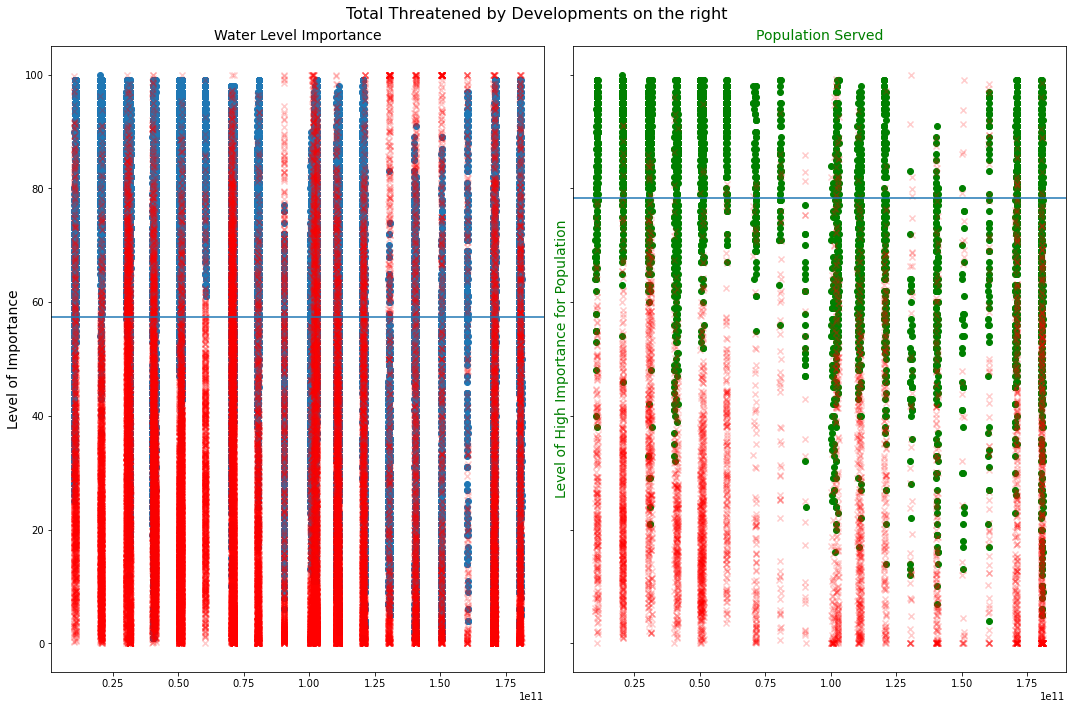

In [6]:
#50930 <- how many subregions have a swdli
#42432 <- how many of those sub regions are affected by development 
#4512 - how many of those subregions serve a population total - 
#4372 - how many of those subregion's forests to wli are highly threatened by developments. 

total = huc_area(df, 100, 2000, 'IMP1')
total_dev = huc_area(total, 100, 2000, 'DEV_FOR3')
total_pop = huc_area(total, 100, 2000, 'POPSERVED')
total_pop_dev = huc_area(total_pop, 100, 2000, 'DEV_FOR3')
pop_served_graph('Total Threatened by Developments on the right', total_pop, total)

In [7]:
#42432 <- count of how many subregions are affacted by dev_for3
total_dev = huc_area(total_pop, 100, 2000, 'DEV_FOR3')
#pop_served_graph('Total', total_pop, total)
total_dev.count()#4372 <- where sdw has an importance variable above 0 and that serves a
                    #populations served where there is developmental threats. 
    
'''Turning into a binomial to figure out is it affected? yes, or no.'''

'Turning into a binomial to figure out is it affected? yes, or no.'

In [29]:
#t test popserved vs not poserved
#power analysis stats models.stats.power

total_dev_lst = list(pd.Series(total_dev['DEV_FOR3']))
reg_1 = list(pd.Series(huc_area(total_dev, 100, 200, 'DEV_FOR3')['DEV_FOR3']))
dev_1 = stats.ttest_ind(total_dev_lst, reg_1)
#Ttest_indResult(statistic=3.259183044804347, pvalue=0.0011662664653931964)
def compare_totals():
    lst = []
    final_lst = []
    lower = 100
    upper = 200 
    for x in range(18):
        lst.append(list(pd.Series(huc_area(total_dev, lower, upper, 'DEV_FOR3')['DEV_FOR3'])))
        lower += 100
        upper += 100
    for i in lst:
        t = stats.ttest_ind(total_dev_lst, i)
        final_lst.extend(t)
        
    return final_lst

compare_totals()

[-6.349250457951684,
 2.371107706902908e-10,
 -3.5930630724705903,
 0.0003300330773824346,
 -11.229421537431934,
 6.649682295626844e-29,
 5.254887578584432,
 1.546661366983034e-07,
 2.5820160677165793,
 0.009850973800126308,
 -6.076123379998652,
 1.331162239135403e-09,
 6.544268165916305,
 6.649441670257508e-11,
 -5.0089380691376935,
 5.68617052177124e-07,
 1.0082850253492623,
 0.31337316936498055,
 6.440515525819506,
 1.3110671565543912e-10,
 5.8080220609227435,
 6.73679282010676e-09,
 5.91812868257681,
 3.4945583736741638e-09,
 3.1912153071045637,
 0.0014266917014877014,
 1.8480039748626276,
 0.06466716948017226,
 2.229407656696678,
 0.025837113611036758,
 -3.7955431669134114,
 0.00014929230130661492,
 -3.419709964813849,
 0.0006322427575919489,
 2.9695925633895928,
 0.002996686292424401]